In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
from matplotlib import image
from matplotlib import pyplot
from datetime import datetime
from numpy import concatenate

In [7]:
from pandas import DataFrame
from pandas import concat


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [10]:
!pip install keras

In [11]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pandas import read_csv


In [16]:
df=pd.read_csv('/kaggle/input/raw-deep-learning-dataset-csv/RAW.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [21]:

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('/kaggle/input/raw-deep-learning-dataset-csv/RAW.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset = dataset[24:] 
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)
dataset.head(10)





/tmp/ipykernel_33/2202085180.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  dataset = pd.read_csv('/kaggle/input/raw-deep-learning-dataset-csv/RAW.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
/tmp/ipykernel_33/2202085180.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv('/kaggle/input/raw-deep-learning-dataset-csv/RAW.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
/tmp/ipykernel_33/2202085180.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work bec

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0


In [26]:
dataset.to_csv('pollution.csv')
dataset=read_csv('pollution.csv',header=0,index_col=0)
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [23]:
values = dataset.values
print(values)
print(dataset.shape[0])

[[129.0 -16 -4.0 ... 1.79 0 0]
 [148.0 -15 -4.0 ... 2.68 0 0]
 [159.0 -11 -5.0 ... 3.57 0 0]
 ...
 [10.0 -22 -3.0 ... 242.7 0 0]
 [8.0 -22 -4.0 ... 246.72 0 0]
 [12.0 -21 -3.0 ... 249.85 0 0]]
43800


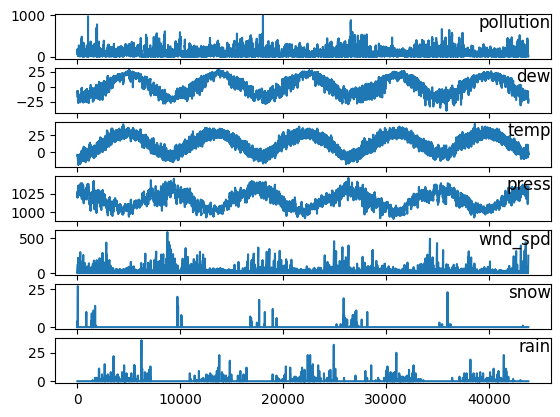

In [24]:
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [28]:
# We will frame the supervised learning problem as predicting the pollution at the current hour (t) 
# given the pollution measurement and weather conditions at the prior time step.

# 1. integer encode of the wind direction 
values = dataset.values
print(values[1:5,1:5])
encoder = LabelEncoder()   # from sklearn library
values[:,4] = encoder.fit_transform(values[:,4])
print(values[1:5,1:5])

# 2. ensure all data is float
values = values.astype('float32')

# 3. normalize all the features in the range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1)) # from sklearn library
scaled = scaler.fit_transform(values)
print(scaled[1:5,:])

[[-15 -4.0 1020.0 'SE']
 [-11 -5.0 1021.0 'SE']
 [-7 -5.0 1022.0 'SE']
 [-7 -5.0 1022.0 'SE']]
[[-15 -4.0 1020.0 2]
 [-11 -5.0 1021.0 2]
 [-7 -5.0 1022.0 2]
 [-7 -5.0 1022.0 2]]
[[0.14889336 0.36764708 0.24590163 0.5272732  0.6666667  0.00381099
  0.         0.        ]
 [0.15995975 0.4264706  0.22950819 0.545454   0.6666667  0.00533197
  0.         0.        ]
 [0.18209255 0.48529413 0.22950819 0.5636368  0.6666667  0.00839101
  0.03703704 0.        ]
 [0.13883299 0.48529413 0.22950819 0.5636368  0.6666667  0.00991199
  0.07407407 0.        ]]


In [30]:
# convert series to supervised learning
# 4. frame as supervised learning: # 8 input variables and the 1 output variable (pollution level at the current hour).

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data) # to access data in a matrix format
    cols, names = list(), list() #initialization as empty list
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i)) 
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

reframed = series_to_supervised(scaled, 1, 1)
print(reframed)
# # drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed)
# print(reframed.head())


       var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2       0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3       0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4       0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5       0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   
...          ...        ...        ...        ...        ...        ...   
43795   0.010060   0.264706   0.278689   0.763638   0.333333   0.385730   
43796   0.008048   0.250000   0.278689   0.781818   0.333333   0.395659   
43797   0.010060   0.264706   0.262295   0.781818   0.333333   0.405588   
43798   0.010060   0.264706   0.262295   0.781818   0.333333   0.413996   
43799   0.008048   0.264706   0.245902   0.781818   0.333333   0.420866   

       var7(t-1)  var8(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)  \
1       0.000000  

In [52]:
#### Define and Fit Model ####

# STEP1: split the dataset into train and test sets
# To speed up the training of the model for this demonstration, 
# we will only fit the model on the first year of data, then evaluate it on the remaining 4 years of data.

values = reframed.values
n_train_hours = 365*4 * 24    # no of rows for one year
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]   # intial 8 cols are X and last col is Y
test_X, test_y = test[:, :-1], test[:, -1]       # intial 8 cols are X and last col is Y
# reshape input to be 3D [samples, timesteps, features] # no of timestep to predice one output
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35040, 1, 8) (35040,) (8759, 1, 8) (8759,)


In [44]:
test_X.shape

(8759, 1, 8)

Epoch 1/50
487/487 - 4s - loss: 0.0339 - val_loss: 0.0318 - 4s/epoch - 9ms/step
Epoch 2/50
487/487 - 2s - loss: 0.0143 - val_loss: 0.0149 - 2s/epoch - 3ms/step
Epoch 3/50
487/487 - 2s - loss: 0.0140 - val_loss: 0.0136 - 2s/epoch - 3ms/step
Epoch 4/50
487/487 - 2s - loss: 0.0140 - val_loss: 0.0133 - 2s/epoch - 3ms/step
Epoch 5/50
487/487 - 2s - loss: 0.0140 - val_loss: 0.0134 - 2s/epoch - 3ms/step
Epoch 6/50
487/487 - 2s - loss: 0.0139 - val_loss: 0.0133 - 2s/epoch - 3ms/step
Epoch 7/50
487/487 - 2s - loss: 0.0139 - val_loss: 0.0134 - 2s/epoch - 3ms/step
Epoch 8/50
487/487 - 2s - loss: 0.0139 - val_loss: 0.0137 - 2s/epoch - 3ms/step
Epoch 9/50
487/487 - 2s - loss: 0.0139 - val_loss: 0.0137 - 2s/epoch - 3ms/step
Epoch 10/50
487/487 - 2s - loss: 0.0139 - val_loss: 0.0139 - 2s/epoch - 3ms/step
Epoch 11/50
487/487 - 2s - loss: 0.0139 - val_loss: 0.0136 - 2s/epoch - 3ms/step
Epoch 12/50
487/487 - 2s - loss: 0.0139 - val_loss: 0.0140 - 2s/epoch - 3ms/step
Epoch 13/50
487/487 - 2s - loss: 0.01

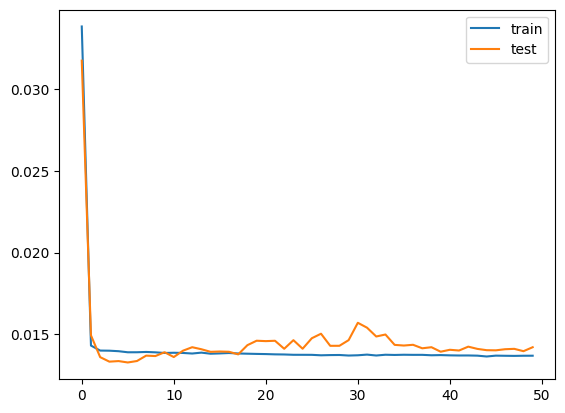

In [32]:
# STEP2: design the network
# defined the LSTM with 50 neurons in the first hidden layer and 
# 1 neuron in the output layer for predicting pollution. The input shape will be 1 time step with 8 features.
model = Sequential()  #The Sequential model API is a way of creating sequential deep learning models
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) #hidden layer for LSTM
#model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.1, input_shape=(train_X.shape[1], train_X.shape[2]))) #hidden layer for LSTM
model.add(Dense(1))                           # output layer

model.compile(loss='mae', optimizer='adam')   # loss function and optimization function
#Adam combines the best properties of the AdaGrad and RMSProp

# STEP3: fit/train the designed network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [53]:
import math
yhat = model.predict(test_X)

274/274 [==============================] - 0s 2ms/step


In [54]:

test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [56]:


# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
print(inv_yhat[1:10])

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
print(inv_y[1:10])
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))


[ 50.560833  61.715572  66.304596  85.91876   90.89447  103.71263
  73.73282   57.40627   33.09011 ]
[ 65.  70.  79.  92. 106.  75.  58.  33.  51.]


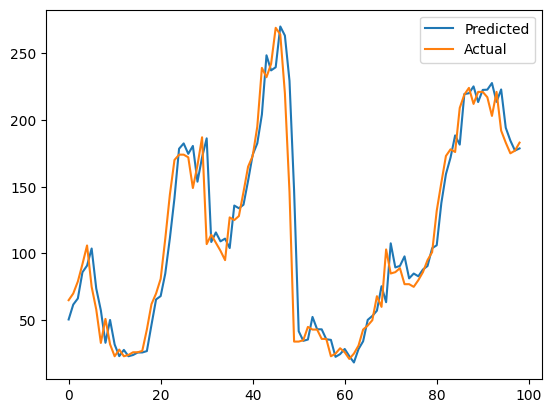

Test RMSE: 25.731


In [57]:
pyplot.plot(inv_yhat[1:100], label='Predicted')
pyplot.plot(inv_y[1:100], label='Actual')
pyplot.legend()
pyplot.show()

print('Test RMSE: %.3f' % rmse)